# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Background**:

E-news Express, an online news portal, wants to acquire new subscribers to expand their business. The company plans to analyze the actions taken by their customers on the website to understand the users’ interest and determine how to increase engagement. Companies analyze users' responses to two variants of a product to decide which of the variants is most effective. This technique is known as a/b testing. It is used to determine if the new feature attracts users based on a chosen metric.

Executives of E-news Express believe there has been a decline in the new monthly subscribers compared to years past. They think the reason for the decline is the current webpage is not designed well enough based-on outline and recommended content to keep the customers interested long term. Without this interest the users do not subscribe.

You are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. The Data Science Team randomly selects 100 users and divides them equally into two groups. The existing landing page is served to the first group. They are considered the control group. The new landing page is served to the second group. This group is considered the treatment group. Data about the customers interaction in both groups is collected in the 'abtest.csv' file. You are being asked to review the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in getting users to subscribe to the news portal.



**Objective**:

Statistical analysis needs to be conducted to determine the effectiveness of the new landing page.

The questions E-news Express would like you to answer is:

1. Which landing page do the users spend more time on?

2. Which landing page has a better conversion rate (the portion of users that visit the landing page and convert)?

3. Does preferred language play a part in whether a customer converts or not?

4. Is the time spent on the new page different based on language users?


**Data Dictionary**:

user_id -Represents the user ID of the person visiting the website

group - Represents whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Represents whether the landing page is old or new

time_spent_on_the_page - Represents the time (in minutes) spent by the user on the landing page

converted - Represents whether the user will be converted to a subscriber of the news portal or not

language_preferred - Represents what language is chosen by the user to view the landing page


## Import all the necessary libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display
from matplotlib.ticker import MaxNLocator

import numpy as np #library used for working with arrays
import pandas as pd #library used for data manipulation and analysis
import matplotlib.pyplot as plt #library for plots and visualisations
import seaborn as sns #library for visualisations
from scipy.integrate import simps #library for numerical integration

custom = {"axes.edgecolor": "purple", "grid.linestyle": "solid", "grid.color": "black"}
sns.set_style("dark", rc = custom)

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats #this library contains a large number of probability distributions and statistical functions

# Function for handling normal distribution and statistical calculation
from scipy.stats import norm

#Import chi2_contingency
from scipy.stats import chi2_contingency

## Reading the Data into a DataFrame

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

**Understanding the structure of the data**

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python_Course/Project_2/abtest.csv')

# returns the first 5 rows
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
# Checking shape of the data (rows by columns)
df.shape

print("There are", df.shape[0], 'rows and', df.shape[1], "columns in the data frame.")
print()

# Use info() to print a concise summary of the DataFrame
df.info()


(100, 6)

There are 100 rows and 6 columns in the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

The dataframe has 100 rows and 6 columns. The Dataframe represents 100 observations and the 6 features that describe the observations.

Columns are user_id, group, landing_page, time_spent_on_the_page, converted, and language_preferred.

user_id currently has a dytpe of integer, it needs converted to a dtype of object.

group, landing_page, converted and language_preferred all have a dtype on integer. These should be converted to dtype category. This will help with the amount of memory being used.

time_spent_on_the_page has a dtype of float.

The memory usage is 4.8+ KB.


In [5]:
#Changes the user_id from integer to object, it should not be considered a numerical column
df['user_id']=df['user_id'].astype(str)


#coverting "objects" to "category" reduces the data space required to store the dataframe
#converting 'group', 'landing_page', 'converted', and 'language_preferred' into categorical data

for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    df[col] = df[col].astype('category')

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    object  
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), object(1)
memory usage: 2.6+ KB


**Observations:**

Changed the user_id to dtype object.

Changed group, landing_page, converted, and language_preferred to dtype category.

Making these changes lowered the memory to 2.6+ KB.

In [6]:
# shows statistical information
df.describe()

,time_spent_on_the_page
count,100.00
mean,5.38
std,2.38
min,0.19
25%,3.88
50%,5.42
75%,7.02
max,10.71


**Observations:**

There were a total of 100 observations included in the dataset.

The average time_spent_on_the page is 5.38 minutes.

50% of all users spent 5.42 minutes or less on the page.

25% of all users spent 3.88 minutes or less on the page.

75% of all users spent 7.02 minutes or less on the page.

The max time a user spent on a page was 10.71 minutes.

The min time a user spent on a pasge was 0.19 minutes.

The std of the time_spent_on_the_page is 2.38 minutes.

All these statistics are based on the population of the dataframe.


In [7]:
df['group'].describe()
df['group'].unique()
print()
df['landing_page'].describe()
df['landing_page'].unique()
print()
df['converted'].describe()
df['converted'].unique()
print()
df['language_preferred'].describe()
df['language_preferred'].unique()

count         100
unique          2
top       control
freq           50
Name: group, dtype: object

['control', 'treatment']
Categories (2, object): ['control', 'treatment']

count     100
unique      2
top       new
freq       50
Name: landing_page, dtype: object

['old', 'new']
Categories (2, object): ['new', 'old']

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

['no', 'yes']
Categories (2, object): ['no', 'yes']

count        100
unique         3
top       French
freq          34
Name: language_preferred, dtype: object

['Spanish', 'English', 'French']
Categories (3, object): ['English', 'French', 'Spanish']

**Observations:**

The column group is divided into 2 groups. One is the control group and the other is the treatment group. There are 50 users in each group.

The landing page is divided into 2 pages. One is the new page and the other is the old page. There are 50 users on each page.

The converted column is also divided into 2 groups. One group is the users that converted (Yes) and the other group is the users that did not covert (No). More users converted than not converted.

There are 3 unique languages_preferred. Those languages are English, French and Spanish. The top language is French.


In [8]:
#Identifies columns that have missing information
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**

There is no missing data in the dataframe.

**Exploratory Data Analysis**

### Univariate Analysis

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 0, 'Landing Page')

Text(0.5, 1.0, 'Time Spent on the Page per Landing Page')

([0, 1], [Text(0, 0, 'new'), Text(1, 0, 'old')])

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 0, 'Group')

Text(0.5, 1.0, 'Time Spent on the Page per Group')

([0, 1], [Text(0, 0, 'control'), Text(1, 0, 'treatment')])

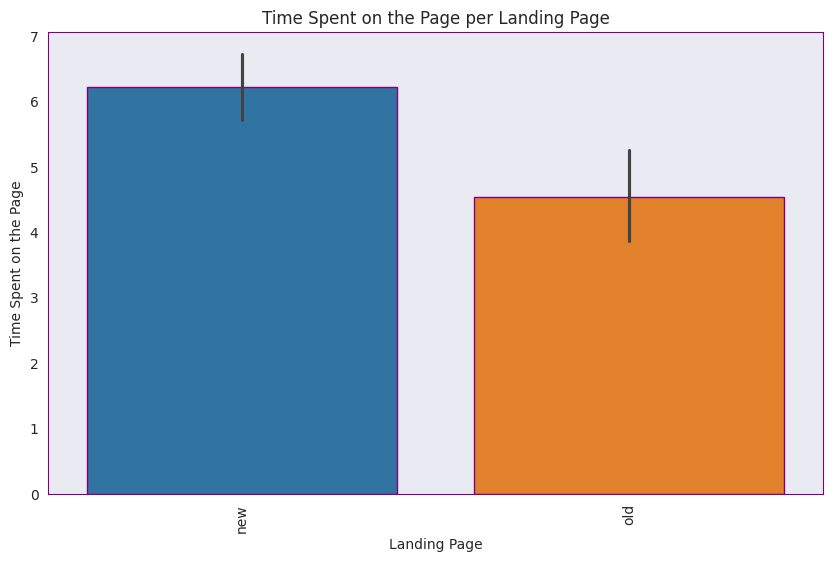

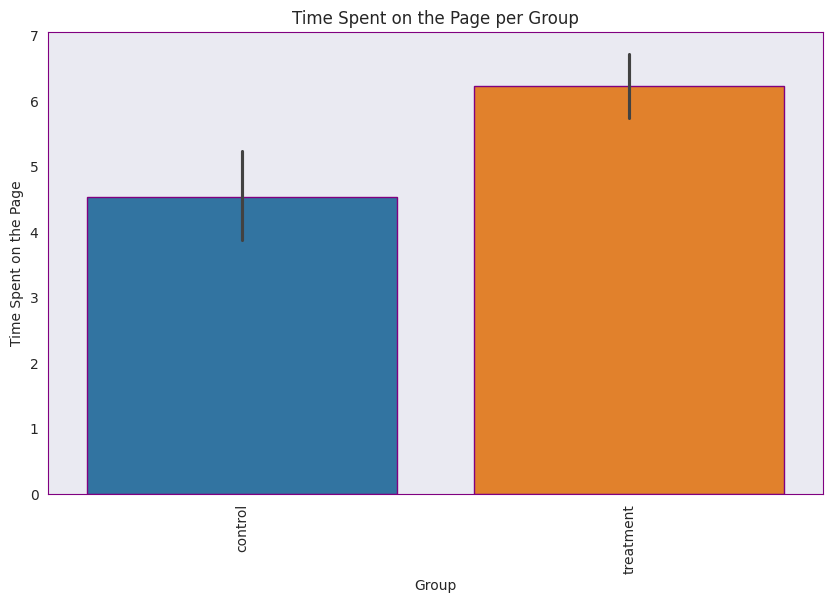

In [9]:
# Barplot showing the time spent on each landing page
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page',edgecolor='purple')
plt.ylabel ('Time Spent on the Page')
plt.xlabel ('Landing Page')
plt.title ('Time Spent on the Page per Landing Page')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis formatting to 'plain'
print()
print()

# Barplot showing what time spent by each group
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='group', y='time_spent_on_the_page', hue='group',edgecolor='purple')
plt.ylabel ('Time Spent on the Page')
plt.xlabel ('Group')
plt.title ('Time Spent on the Page per Group')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis formatting to 'plain'


In [10]:
#Calculating the mean, std, 25%, median, 75%, min and max of the time spent on the landing page
time_spent_per_landing_page = df.groupby('landing_page', dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_landing_page.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_landing_page)
print()
print()

#Calculating the mean, std, 25%, median, 75%, min and max of the time spent per group
time_spent_per_group = df.groupby('group', dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_group.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_group)


  landing_page  mean_time_spent  std_time_spent  time_spent_25%  \
0          new             6.22            1.82            5.18   
1          old             4.53            2.58            2.72   

   time_spent_median  time_spent_75%  min_time_spent  max_time_spent  
0               6.11            7.16            1.65           10.71  
1               4.38            6.44            0.19           10.30  


       group  mean_time_spent  std_time_spent  time_spent_25%  \
0    control             4.53            2.58            2.72   
1  treatment             6.22            1.82            5.18   

   time_spent_median  time_spent_75%  min_time_spent  max_time_spent  
0               4.38            6.44            0.19           10.30  
1               6.11            7.16            1.65           10.71  


**Observations:**

The average time spent on the new landing page is 1.69 minutes higher than the old landing page.

25% of users spend 5.18 minutes or less on the new landing page compared to only 2.72 minutes on the old landing page.

75% of users spend 7.16 minutes or less on the new landing page compared to only 6.44 minutes on the old landing page.

The max time spent per landing page only differs by 41 seconds.

The difference between the mean and median for the new landing page is 11 seconds. the difference between the mean and median for the old landing page is 15 seconds.

The min time spent at the new landing page is 1.65 minutes and 19 seconds on the old landing page.

As expected the new landing page and treatment group match. The old landing page and control group match.


<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 0, 'Preferred Language')

Text(0.5, 1.0, 'Time Spent on the Page per Preferred Language')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 0, 'Preferred Language')

Text(0.5, 1.0, 'Time Spent on the Page per Preferred Language by Group')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 0, 'Preferred Language')

Text(0.5, 1.0, 'Time Spent on the Page per Preferred Language by Converted to Subscribe')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

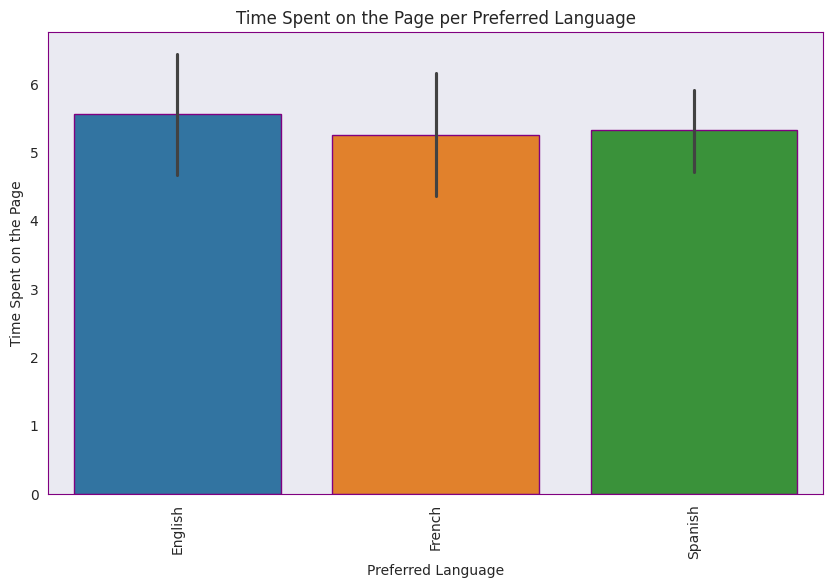

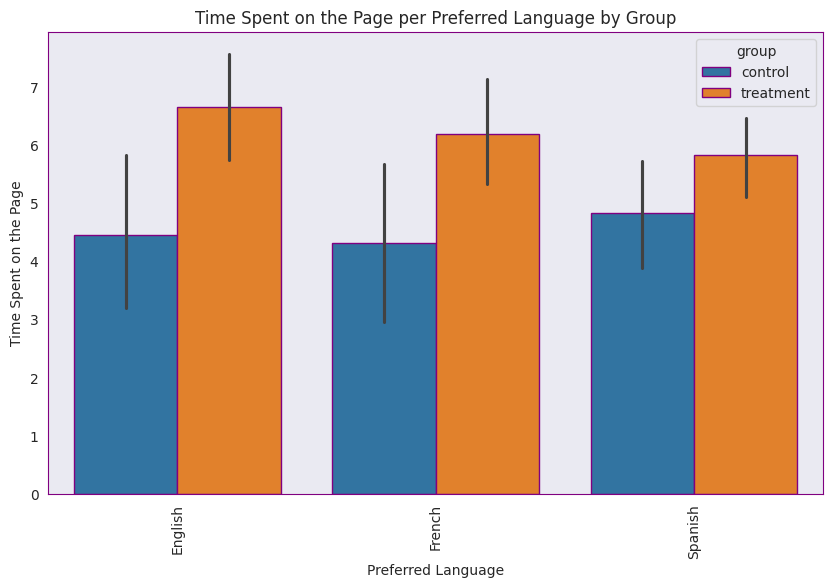

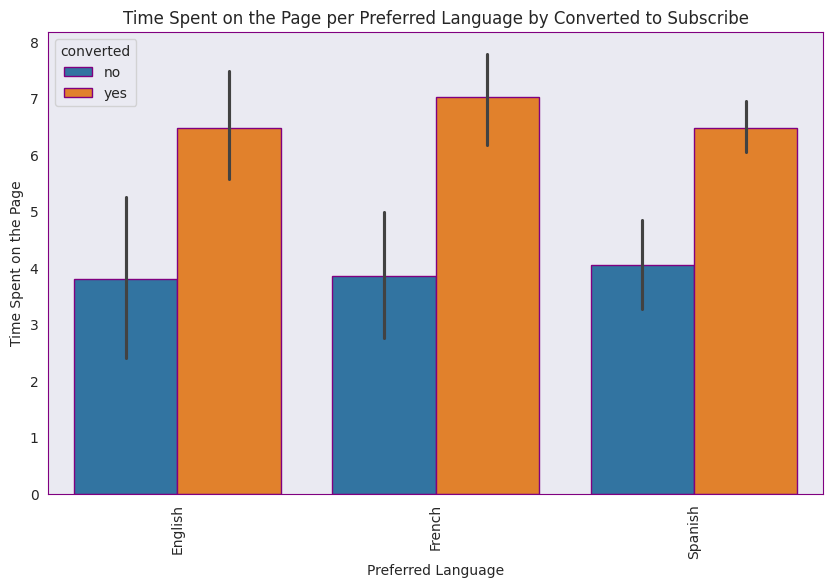

In [11]:
# Barplott showing time spent per language preferred
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred', edgecolor='purple')
plt.ylabel ('Time Spent on the Page')
plt.xlabel ('Preferred Language')
plt.title ('Time Spent on the Page per Preferred Language')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis formatting to 'plain'
print()
print()

# Barplot showing time spent per language preferred and group
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='group', edgecolor='purple')
plt.ylabel ('Time Spent on the Page')
plt.xlabel ('Preferred Language')
plt.title ('Time Spent on the Page per Preferred Language by Group')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis formatting to 'plain'
print()
print()

# Barplot showing showing time spent per language preferred and converted
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', edgecolor='purple')
plt.ylabel ('Time Spent on the Page')
plt.xlabel ('Preferred Language')
plt.title ('Time Spent on the Page per Preferred Language by Converted to Subscribe')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  # Set y-axis formatting to 'plain'

**Observations:**

**Based on the graphs**

More time is spent on the webpages showing English than French or Spanish.

All languages are showing an increase in time spent on the new landing page compared to the old landing page.

More users visiting the landing page showing French converted to subcribe compared to the other languages.


In [12]:
#Calculating the mean, std, 25%, median, 75%, min and max based on time spent per language preferred
time_spent_per_preferred_language = df.groupby('language_preferred', dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_preferred_language.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_preferred_language)



  language_preferred  mean_time_spent  std_time_spent  time_spent_25%  \
0            English             5.56            2.62            3.62   
1             French             5.25            2.68            3.40   
2            Spanish             5.33            1.82            4.47   

   time_spent_median  time_spent_75%  min_time_spent  max_time_spent  
0               5.76            7.14            0.22           10.50  
1               5.31            7.37            0.40           10.71  
2               5.61            6.52            0.19            8.72  


**Observations:**

**Based off Preferred Language and Time Spent Per Page**

Although 2 less users chose English as their preferred language, English has the highest mean_time_spent at 5.56 minutes followed by Spanish at 5.33 minutes then French at 5.25 minutes.

The max time spent was spent on page with French on it 10.71 minutes, followed by English at 10.50 minutes and last Spanish followed by 8.72 minutes.

The median time spent on a page averages between 5.31 and 5.76 for all languages combined.

The least amount of time was spent on a page showing in Spanish. This user only spent 19 seconds on the page.


In [13]:
#Calculating the mean, std, 25%, median, 75%, min and max based on time spent per language preferred and group
time_spent_per_language_and_group = df.groupby(['language_preferred','group'], dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_language_and_group.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_language_and_group)

  language_preferred      group  mean_time_spent  std_time_spent  \
0            English    control             4.45            2.77   
1            English  treatment             6.66            1.98   
2             French    control             4.31            3.02   
3             French  treatment             6.20            1.93   
4            Spanish    control             4.83            1.99   
5            Spanish  treatment             5.84            1.53   

   time_spent_25%  time_spent_median  time_spent_75%  min_time_spent  \
0            2.93               3.70            6.16            0.22   
1            5.33               6.87            7.71            3.65   
2            1.81               4.18            7.40            0.40   
3            5.25               5.42            7.27            3.30   
4            4.05               4.75            6.21            0.19   
5            5.15               6.20            6.70            1.65   

   max_time_spent 

**Observations:**

**Based off Preferred Language, Group and Time Spent Per Page**

The mean time spent on the new langing page over the old landing page were:
  English increase of 2.21 minutes.
  French increase of 1.89 minutes.
  Spanish increase of 1.01 minutes.

The max time spent on the new langing page over the old landing page were:
  English increase of 20 seconds.
  French increase of 1.56 minutes.
  Spanish decrease of 64 seconds.

The median time spent on the new langing page over the old landing page were:
  English increase of 3.17 minutes.
  French increase of 1.24 minutes.
  Spanish decrease of 1.46 seconds.

The min time spent on the new langing page over the old landing page were:
  English increase of 3.43 minutes.
  French increase of 2.90 minutes.
  Spanish decrease of 4.45 seconds.

The biggest increases came from the new landing page showing English.

In [14]:
#Calculating the mean, std, 25%, median, 75%, min and max based on time spent per language preferred and converted
time_spent_per_language_and_converted = df.groupby(['language_preferred','converted'], dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_language_and_converted.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_language_and_converted)

  language_preferred converted  mean_time_spent  std_time_spent  \
0            English        no             3.81            2.55   
1            English       yes             6.47            2.20   
2             French        no             3.86            2.54   
3             French       yes             7.02            1.63   
4            Spanish        no             4.05            1.67   
5            Spanish       yes             6.47            1.02   

   time_spent_25%  time_spent_median  time_spent_75%  min_time_spent  \
0            2.56               3.65            5.02            0.22   
1            5.28               6.52            7.46            2.58   
2            1.86               3.68            4.81            0.40   
3            5.71               6.79            8.05            5.25   
4            3.33               4.43            4.94            0.19   
5            5.95               6.44            7.06            4.75   

   max_time_spent  
0    

**Observations:**

**Based off Preferred Language, Converted and Time Spent Per Page**

The mean time difference between a user who converted to a subcriber and those that didn't is:
  English increase of 2.66 minutes.
  French increase of 3.16 minutes.
  Spanish increase of 2.42 minutes.

The max time difference between a user who converted to a subcriber and those that didn't is:
  English increase of 1.77 minutes.
  French increase of 1.56 minutes.
  Spanish decrease of 2.02 seconds.

The median time difference between a user who converted to a subcriber and those that didn't is:
  English increase of 2.87 minutes.
  French increase of 3.11 minutes.
  Spanish increase of 2.01 minutes.

The min time difference between a user who converted to a subcriber and those that didn't is:
  English increase of 2.36 minutes.
  French increase of 4.85 minutes.
  Spanish decrease of 4.56 seconds.

The biggest increases came from the French page. More users stayed on the page then converted.
However all th the languages were pretty consistent with only small difference between the lowest and highest in terms of time spent on page coverting over a subscribe user.

language_preferred                English  French  Spanish
landing_page group     converted                          
new          control   no             NaN     NaN      NaN
                       yes            NaN     NaN      NaN
             treatment no            5.51    4.40     4.66
                       yes           7.36    6.95     6.48
old          control   no            1.78    3.67     3.69
                       yes           5.67    7.30     6.46
             treatment no             NaN     NaN      NaN
                       yes            NaN     NaN      NaN

<Axes: xlabel='landing_page,group,converted'>

Text(0.5, 0, 'Categories')

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 1.0, 'Comparison of Landing Page, Group, Language Preferred and Converted')

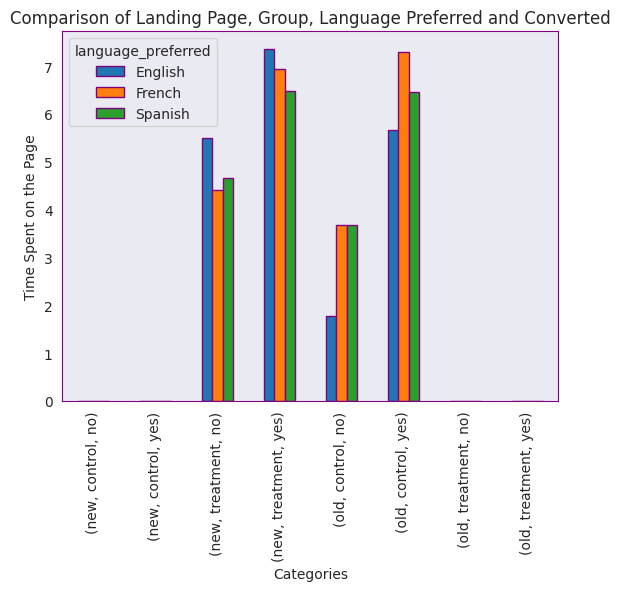

In [15]:
# Grouped by the categorical columns (landing_page, group, and converted) and calculate the mean of the numerical column (time_spent_on_the_page)
combination_comparison = df.groupby(['landing_page', 'group', 'converted','language_preferred'])['time_spent_on_the_page'].mean().unstack()
combination_comparison
print()
print()


# Create a grouped bar chart
combination_comparison.plot(kind='bar', stacked=False,edgecolor='purple')
plt.xlabel('Categories')
plt.ylabel('Time Spent on the Page')
plt.title('Comparison of Landing Page, Group, Language Preferred and Converted')
plt.show()

**Observations:**

As you can tell from the graph there are only 12 cateogry combinations that has activity.
1. English, new landing page, group treatment and converted
2. English, new landing page, group treatment and not converted
3. English, old landing page, group control and converted
4. English, old landing page, group control and not converted
5. French, new landing page, group treatment and converted
6. French, new landing page, group treatment and not converted
7. French, old landing page, group control and converted
8. French, old landing page, group control and not converted
9. Spanish, new landing page, group treatment and converted
10. Spanish, new landing page, group treatment and not converted
11. Spanish, old landing page, group control and converted
12. Spanish, old landing page, group control and not converted

The barplot is based on the mean of time_spent_on_the_page.

The most time spent looking at the page is the English, new landing page, group treatment and converted combination.

The least time spent looking at the page is the English, old landing page, group control and not converted combination.

The highest average time spent on the page had a combination of English, group treatment, new landing page, and converted yes.

The lowest average time spent on the page had a combination of English, group control, oldlanding page, and converted no.

When comparing the new-treatement-not converted combination to old-control-not converted:
1. English more time was spent on the new landing page by an average of 3.73 minutes.
2. French more time was spent on the new landing page by an average of 73 seconds.
3. Spanish more time was spent on the new landing page by an average of 97 seconds.

When comparing the new-treatment-converted combination to the old-control-converted combination:
1. English more time was spent on the new landing page by an average of 1.69 minutes.
2. French less time was spent on the new landing page by an average of 35 seconds.
3. Spanish more time was spent on the new landing page by an average of 2 seconds.



In [16]:
#Calculating the mean, std, 25%, median, 75%, min and max based on time spent per language preferred, landing page, group and converted
combination_comparison_statistical = df.groupby(['language_preferred','landing_page', 'group', 'converted'], dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

#Excludes any NaN
combination_comparison_statistical.dropna(inplace=True)

combination_comparison_statistical.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(combination_comparison_statistical)

   language_preferred landing_page      group converted  mean_time_spent  \
2             English          new  treatment        no             5.51   
3             English          new  treatment       yes             7.36   
4             English          old    control        no             1.78   
5             English          old    control       yes             5.67   
10             French          new  treatment        no             4.40   
11             French          new  treatment       yes             6.95   
12             French          old    control        no             3.67   
13             French          old    control       yes             7.30   
18            Spanish          new  treatment        no             4.66   
19            Spanish          new  treatment       yes             6.48   
20            Spanish          old    control        no             3.69   
21            Spanish          old    control       yes             6.46   

    std_tim

**Observations:**

**Comparisons were done between landing_page, language_preferred, group, and converted based on time_spent_on_the_page.**

When comparing the new-treatement-not converted combination to old-control-not converted:
1. English the max time spent on the new landing page went up 5.6 minutes compared to the old landing page.
2. French the max time spent on the new landing page went down 3.75 minutes compared to the old landing page.
3. Spanish the max time spent on the new landing page went up 1.23 minutes compared to the old landing page.

When comparing the new-treatment-converted combination to the old-control-converted combination:
1. English the max time spent on the new landing page went up 2 seconds compared to the old landing page.
2. French the max time spent on the new landing page went up 2.25 minutes compared to the old landing page.
3. Spanish the max time spent on the new landing page went down 64 seconds compared to the old landing page.

When comparing the new-treatement-not converted combination to old-control-not converted:
1. English the min time spent on the new landing page went up 3.43 minutes compared to the old landing page.
2. French the min time spent on the new landing page went up 2.90 minutes compared to the old landing page.
3. Spanish the min time spent on the new landing page went up 1.46 minutes compared to the old landing page.

When comparing the new-treatment-converted combination to the old-control-converted combination:
1. English the min time spent on the new landing page went up 2.5 minutes compared to the old landing page.
2. French the min time spent on the new landing page went down 79 seconds compared to the old landing page.
3. Spanish the min time spent on the new landing page stayed the same compared to the old landing page.

When comparing the new-treatement-not converted combination to old-control-not converted:
1. English the median time spent on the new landing page went up 2.94 minutes compared to the old landing page.
2. French the median time spent on the new landing page went up 1.84 minutes compared to the old landing page.
3. Spanish the median time spent on the new landing page went up 53 seconds compared to the old landing page.

When comparing the new-treatment-converted combination to the old-control-converted combination:
1. English the median time spent on the new landing page went up 1.18 minutes compared to the old landing page.
2. French the median time spent on the new landing page went down 99 seconds compared to the old landing page.
3. Spanish the median time spent on the new landing page went down 12 seconds compared to the old landing page.

The only std that moved more than a minute is the combination of French-new-treatement-not converted compared to French-old-control-not converted which went down 2.04 minutes.




### Bivariate Analysis

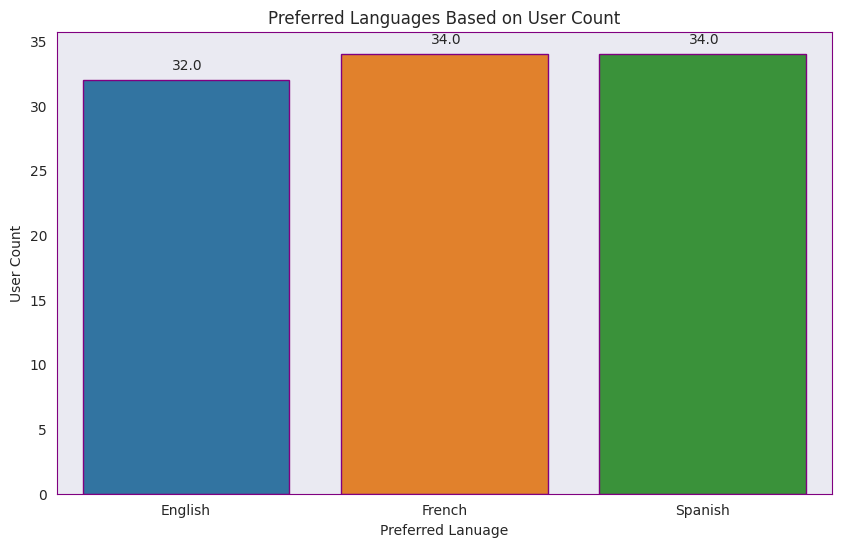

In [17]:
#count of user ids
user_count = df['user_id'].value_counts().sum()

#Countplot that shows how many users preferred each language
plt.figure(figsize=(10,6))
ax = sns.countplot(x='language_preferred', data=df, hue = 'language_preferred',edgecolor='purple')
plt.xlabel ('Preferred Lanuage')
plt.ylabel ('User Count')
plt.title ('Preferred Languages Based on User Count')

# Label each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();



language_preferred
English    32
French     34
Spanish    34
Name: user_id, dtype: int64



<Figure size 1000x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x79cf23fd82b0>,
 [Text(0.5894094953465411, 0.928760704807937, 'English'),
  Text(-1.0978293989430645, 0.06906960848527927, 'French'),
  Text(0.5299290306818469, -0.9639373540021147, 'Spanish')],
 [Text(0.3214960883708406, 0.5065967480770565, '32.0%'),
  Text(-0.598816035787126, 0.03767433190106142, '34.0%'),
  Text(0.28905219855373465, -0.5257840112738806, '34.0%')])

Text(0.5, 1.0, 'Preferred Language')

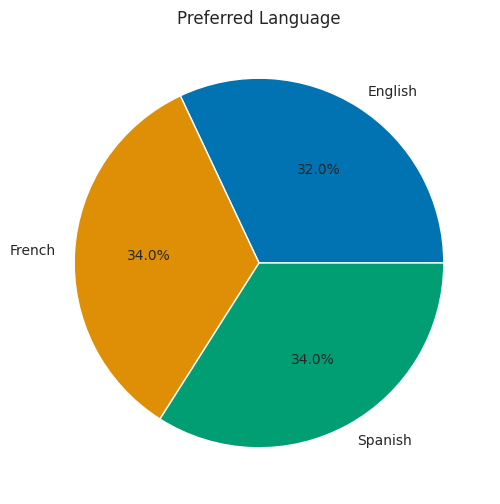

In [18]:
# Groupby user_id and language_preferred
users_per_language = df.groupby('language_preferred')['user_id'].count()
print(users_per_language)
print()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    users_per_language,                    # Data values (sizes of the pie slices)
    labels=users_per_language.index,       # Labels for each slice,cuisine names
    autopct='%1.1f%%',             # Display percentages with one decimal place
    colors=sns.color_palette('colorblind')  # Colors for each slice, using a muted color palette.
)
plt.title('Preferred Language')
plt.show();
print()
print()

language_preferred
English   5.56
French    5.25
Spanish   5.33
Name: time_spent_on_the_page, dtype: float64

<Figure size 500x400 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

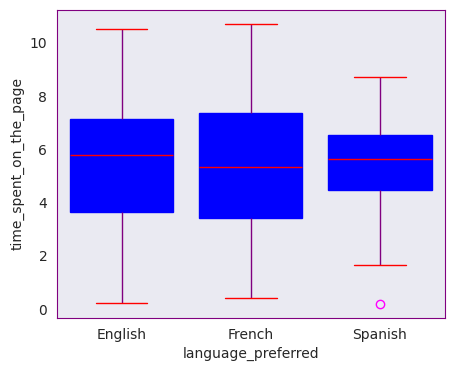

In [19]:
#Create a groupby that includes language preferred and the mean time spent on the page
average_time_per_language = df.groupby('language_preferred')['time_spent_on_the_page'].mean()
average_time_per_language
print()
print()

plt.figure(figsize=(5,4))
# specify colors
c = "blue"
d = "red"
e = "purple"
f = "magenta"

#Create boxplot for landing page and time spent on the page
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'language_preferred', notch=False, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=d),
            whiskerprops=dict(color=e),
            flierprops=dict(color=f, markeredgecolor=f),
            medianprops=dict(color=d),
            )


**Observations:**

32% of all users prefer English.

34% of all users prefer French.

34% of all users prefer Spanish.

The average time spent:
  Preferred English 5.56 minutes
  Preferred French  5.25 minutes
  Preferred Spanish 5.33 minutes

Spanish had an outlier.

From top average at 5.56 minutes to lowest average at 5.25 minutes there is only a difference of 31 seconds.

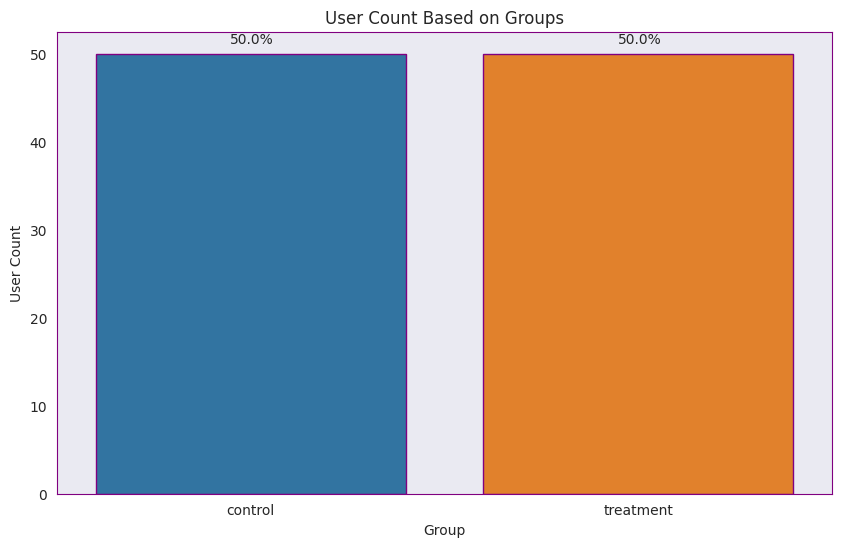

In [20]:
#Countplot amount of users per group
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group', data=df, hue = 'group',edgecolor='purple')
plt.xlabel ('Group')
plt.ylabel ('User Count')
plt.title ('User Count Based on Groups')

# Label each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    percentage = height / user_count * 100  # Calculate the percentage
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();

**Observations:**

The result is as expected. The users were broke into two equal groups. Those groups are control and treatment.

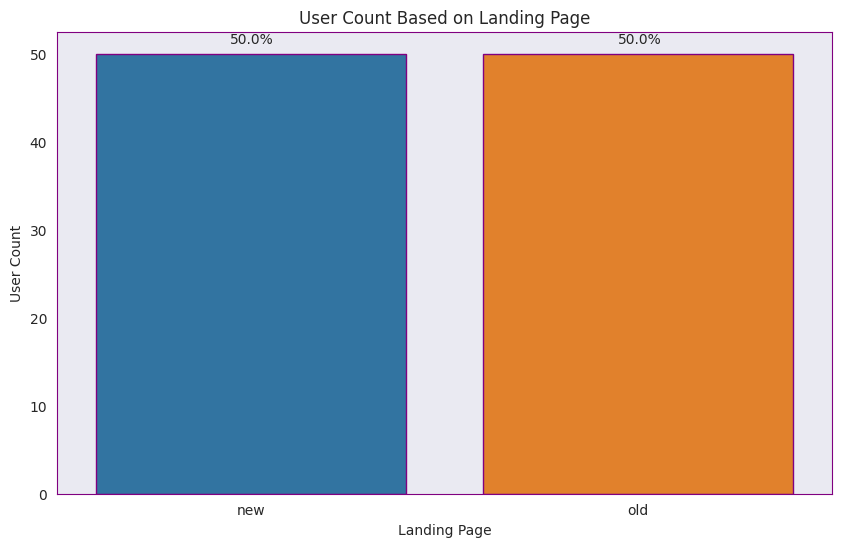

In [21]:
#Countplot users per landing page
plt.figure(figsize=(10,6))
ax = sns.countplot(x='landing_page', data=df, hue = 'landing_page',edgecolor='purple')
plt.xlabel ('Landing Page')
plt.ylabel ('User Count')
plt.title ('User Count Based on Landing Page')

# Label each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    percentage = height / user_count * 100  # Calculate the percentage
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();


**Observations:**

The result is as expected. The users were broke into two equal groups.

The first group is directed to the old landing page, the second group is directed to the new landing page.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Converted to Subscribe')

Text(0, 0.5, 'User Count')

Text(0.5, 1.0, 'Users Converted to Subscribe')

Text(1, 10, '46.0%')

Text(1, 10, '54.0%')

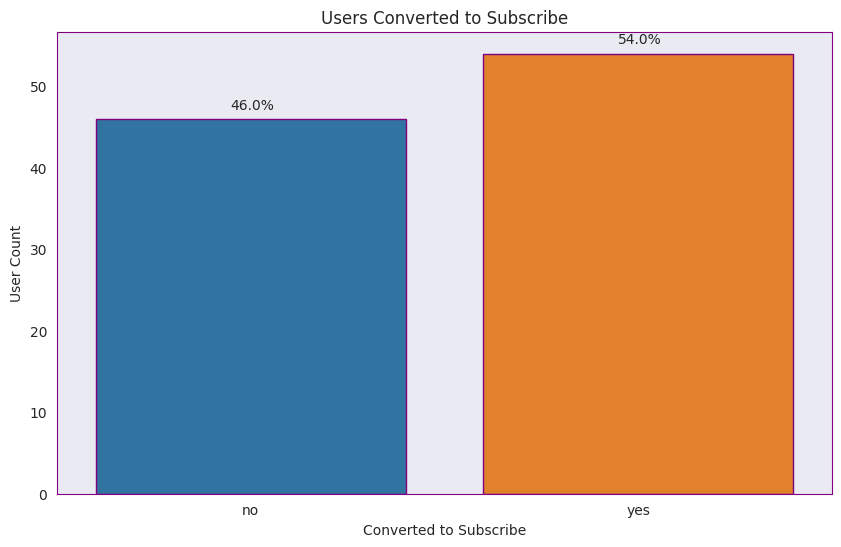

In [22]:
#Countplot based on user count and converted
plt.figure(figsize=(10,6))
ax = sns.countplot(x='converted', data=df, hue = 'converted',edgecolor='purple')
plt.xlabel ('Converted to Subscribe')
plt.ylabel ('User Count')
plt.title ('Users Converted to Subscribe')

# Label each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    percentage = height / user_count * 100  # Calculate the percentage
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();
print()
print()


converted
no    3.92
yes   6.62
Name: time_spent_on_the_page, dtype: float64

<Figure size 500x400 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

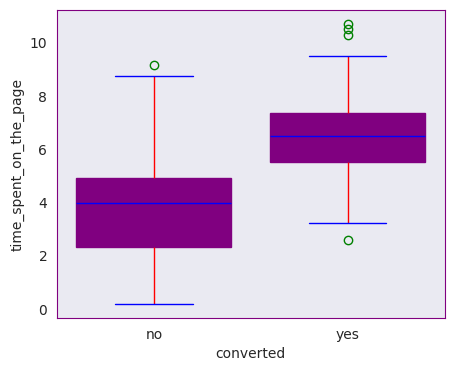

In [23]:

#Create a groupby that includes converted and the mean time spent on the page
average_time_per_converted = df.groupby('converted')['time_spent_on_the_page'].mean()
average_time_per_converted
print()
print()

plt.figure(figsize=(5,4))
# specify colors
c = "purple"
d = "blue"
e = "red"
f = "green"

#Create boxplot for landing page and time spent on the page
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'converted', notch=False, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=d),
            whiskerprops=dict(color=e),
            flierprops=dict(color=f, markeredgecolor=f),
            medianprops=dict(color=d),
            )


**Observations:**

54% of all users converted to subscibe.
46% of all users did not convert to subscribe.

Users that did not converted spent an average of 3.92 minutes looking at the page, whereas those that converted spent an averge 6.62 minutes looking at the page.

Not converted has an outlier of over 8 minutes.
Coverted has outliers who spent more and less than the 25% and 75% percentiles.

<Figure size 1000x700 with 0 Axes>

Text(0.5, 0, 'Time Spent on the Page per User')

Text(0, 0.5, 'User Count')

Text(0.5, 1.0, 'Time Spent on the Page')

Text(1, 10, '6')

Text(1, 10, '5')

Text(1, 10, '6')

Text(1, 10, '10')

Text(1, 10, '14')

Text(1, 10, '15')

Text(1, 10, '18')

Text(1, 10, '11')

Text(1, 10, '9')

Text(1, 10, '3')

Text(1, 10, '3')

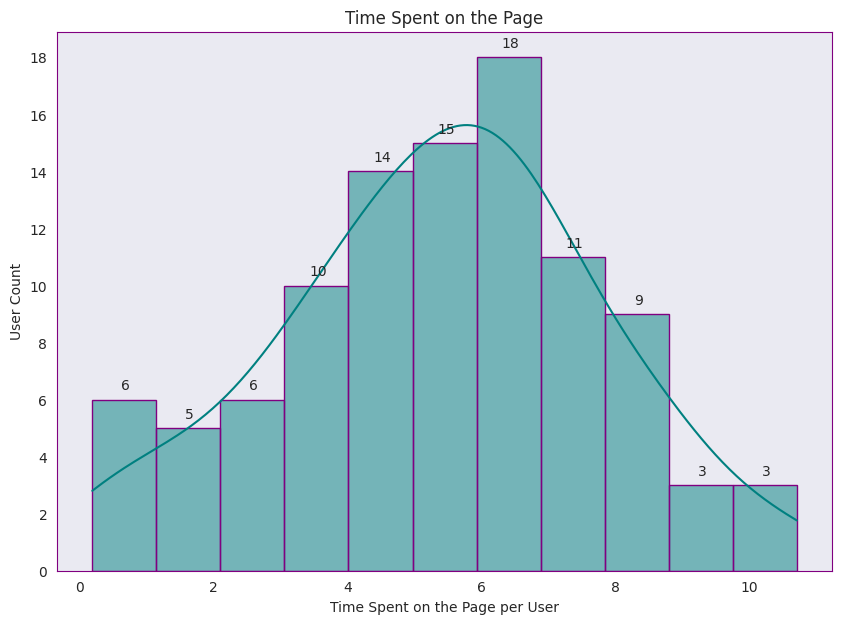

In [24]:
sns.set_style("dark", rc = custom)

# Histogram showing the time_spent_on_the_page per user
# Set y-axis ticks to display integer values only
plt.figure(figsize=(10, 7))
ax = sns.histplot(df['time_spent_on_the_page'],bins=50, binwidth = 1,  stat = 'count', color='teal', edgecolor='purple', kde=True)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel ('Time Spent on the Page per User')
plt.ylabel ('User Count')
plt.title ('Time Spent on the Page')

# Label each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.show();
print()
print()



<Figure size 640x480 with 0 Axes>

[Text(0.5, 1.0, 'Time Spent per User on the Page')]


In the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.



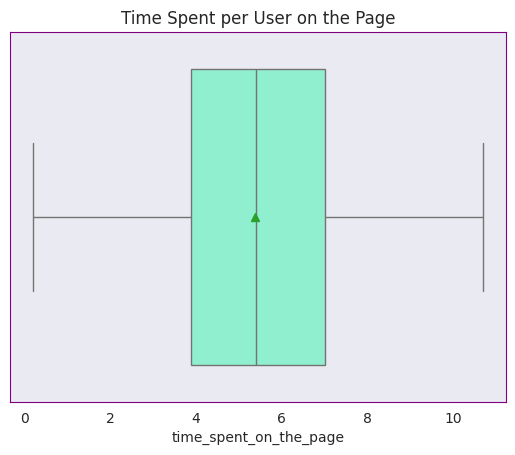

In [25]:
# Boxplot based on time_spent_on_the_page
plt.figure()
ax = sns.boxplot(data=df,x='time_spent_on_the_page', color='aquamarine',showmeans=True)
ax = plt.gca()
ax.set(title= 'Time Spent per User on the Page')

print("\nIn the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.")
print("The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.\n")


plt.show();
print()
print()

In [26]:
df.describe()

,time_spent_on_the_page
count,100.00
mean,5.38
std,2.38
min,0.19
25%,3.88
50%,5.42
75%,7.02
max,10.71


**Observations:**

Based on the histogram the time_spent_on_the_page has a normal distribution.

18 users spent between 6 and 7 minutes on the page.

3 users spent 10 minutes or more on the page.

The graph does show that the 75% measurement that the describe function indicated was correct.

75% of all users spent 7.02 minutes or less on the page.

6 years spent the least amount of time on the page.

The mean and median only have a differece of 4 seconds.

**Hypothesis Testing**

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

landing_page
new   6.22
old   4.53
Name: time_spent_on_the_page, dtype: float64

<Figure size 400x300 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

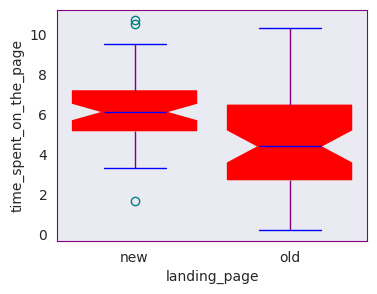

In [27]:
#Create a groupby that includes landing page and the mean time spent on the page
average_time_per_page = df.groupby('landing_page')['time_spent_on_the_page'].mean()
average_time_per_page
print()
print()

plt.figure(figsize=(4,3))
# specify colors
c = "red"
d = "blue"
e = "purple"
f = "teal"

#Create boxplot for landing page and time spent on the page
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'landing_page', notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=d),
            whiskerprops=dict(color=e),
            flierprops=dict(color=f, markeredgecolor=f),
            medianprops=dict(color=d),
            )


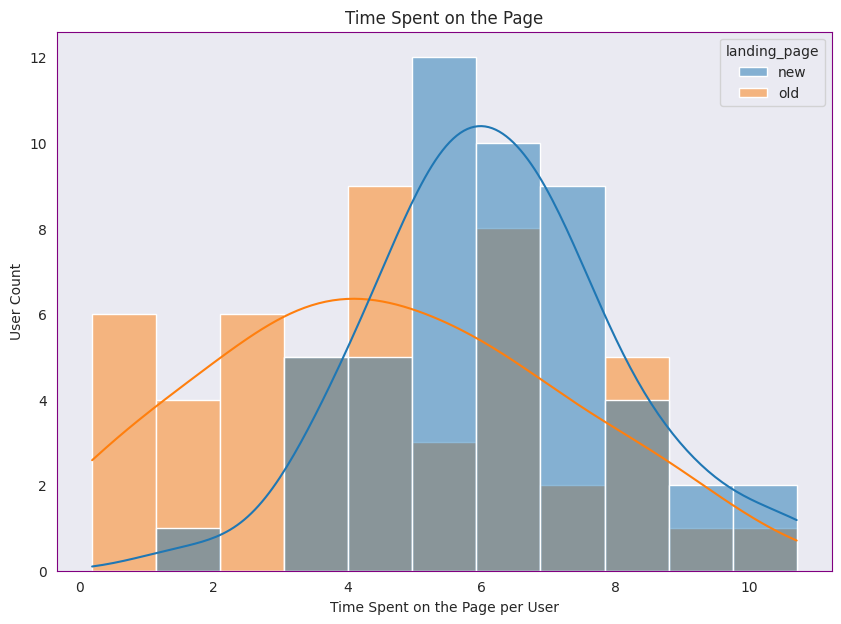

In [28]:
#Create histplot base on time spent on the page and landing page
plt.figure(figsize=(10, 7))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page', kde = True, binwidth = 1) # histogram

ax.set_xlabel("Spent Time (min)", fontsize = 20) # set 2nd x-axis label
ax.set_ylabel("Number of Users", fontsize = 20); # set y-axis label
ax.set_xlim([0,11]) # set x-axis limits
ax.set_xticks(range(0,12,1)); # set x-axis ticks
ax.set_ylim([0,14]) # set y-axis limits

plt.xlabel ('Time Spent on the Page per User') #xlabel
plt.ylabel ('User Count') #ylabel
plt.title ('Time Spent on the Page') #title

ax.legend(labels = ['Old','New'], title = 'Landing Page'); # Set legend title and labels for histograms


**Observations:**

Based on the boxplot, on average users are spending more time viewing the new page than the old page.

The new page does have some outliers that have very low time spent and very high time spent.

Average time spent on the new page is 6.22 minutes.

Average time spent on the old page is 4.53 minutes.

Both landing pages have a normal distribution that skews slightly right.


### Step 1: Define the null and alternate hypotheses

**Comparison based on time spent on the page**

Let  μ  be the average time spent on landing page.

H0 = Average time spent on old landing page >= Average time spent on new landing page

Ha = Average time spent on old landing page < Average time spent on new landing page

μ1 = Average time spent on old landing page

μ2 = Average time spent on new landing page

The null hypothesis can be written as

H0:μ1=μ2

against the alternate hypothesis

Ha:μ1<μ2

### Step 2: Select Appropriate test

Since we have two populations means, the population standard deviations are unknown, and the two landing pages are independent of each other I will perform a two-sample independent t-test. This wil be a one-tailed test since we are trying to see if the new landing page has a higher amount of time spent viewing it than the old landing page.

### Step 3: Decide the significance level

The significance level provided is $\alpha$=0.05.

### Step 4: Collect and prepare data

In [29]:
# time spent on old landing page by users
time_spent_old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# time spent on new landing page by users
time_spent_new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

In [30]:
print('The sample mean of the time spent on the old page is:', round(time_spent_old_page.mean(),2),end='.')
print()
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old_page.std(),2),end='.')
print()
print('The sample mean of the time spent on the old page is:', round(time_spent_new_page.mean(),2),end='.')
print()
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new_page.std(),2),end='.')


The sample mean of the time spent on the old page is: 4.53.
The sample standard deviation of the time spent on the old page is: 2.58.
The sample mean of the time spent on the old page is: 6.22.
The sample standard deviation of the time spent on the new page is: 1.82.

**Two-sample independent t-test assumptions:**

Continuous data - Yes, the time spent on the pages is measured on a continuous scale.

Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.

Independent populations - As we are taking random samples for two different landing pages, the two samples are from two independent populations.

Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different. The old landing page has a sample standard deviation of 2.58, whereas the new landing page has a sample standard deviation of 1.82.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Based on these answers we can use the two sample independent t-test.

### Step 5: Calculate the p-value

In [31]:
# Perform a two-sample independent t-test and determine the p-value
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(time_spent_new_page, time_spent_old_page, equal_var = False, alternative = 'greater')

print('The p-value is', p_value,end='.')

The p-value is 0.0001392381225166549.

### Step 6: Compare the p-value with $\alpha$

In [32]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_value < 0.05:
    print(f'As the p-value of {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value of {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value of 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than 5%, we reject the null hypothesis that says the amount of time spent on both landing pages is the same. We have enough statistical evidence to say the new landing page entices users to spend more time on their page than the old landing page did.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [33]:
pd.crosstab(df['converted'],df['landing_page'])

landing_page,new,old
converted,,
no,17,29
yes,33,21


<Figure size 1500x600 with 0 Axes>

Text(0.5, 0, 'User Converted to a Subscription Based on Landing Page')

Text(0, 0.5, 'User Count')

Text(0.5, 1.0, 'Conversion based on Landing Page')

(0.0, 40.0)

Text(0, 10, '34.0%')

Text(0, 10, '17.0')

Text(0, 10, '66.0%')

Text(0, 10, '33.0')

Text(0, 10, '58.0%')

Text(0, 10, '29.0')

Text(0, 10, '42.0%')

Text(0, 10, '21.0')

Text(0, 10, '0.0%')

Text(0, 10, '0')

Text(0, 10, '0.0%')

Text(0, 10, '0')

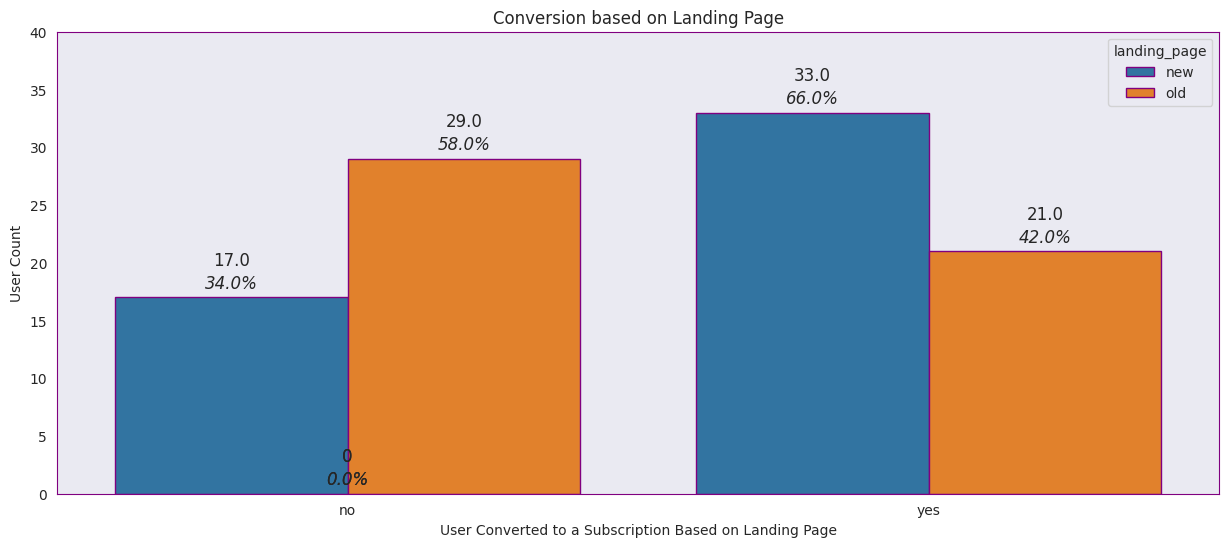

In [34]:
#Create a countplot based on converted and landing page
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='converted', data=df, hue='landing_page', edgecolor='purple')

plt.xlabel('User Converted to a Subscription Based on Landing Page')
plt.ylabel('User Count')
plt.title('Conversion based on Landing Page')

# Increase the height of the y-axis
plt.ylim(0, 40)

# Label each bar with its count and percentage
for p in ax.patches:
    prc = "{:.1f}%".format(100.0 * p.get_height() / (df.shape[0] / 2))  # percentage
    cnt = p.get_height()  # count
    xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
    yy = p.get_height()  # y coordinate of bar percentage label
    ax.annotate(prc, (xx, yy), ha="center", va="center", style='italic', size=12, xytext=(0, 10),
               textcoords="offset points")  # annotate percentage
    ax.annotate(cnt, (xx, yy + 2), ha="center", va="center", size=12, xytext=(0, 10),
               textcoords="offset points")  # annotate count

plt.show()

**Observations:**

Based on the graph and crosstab above:

17 users who visited the new landing page and 29 users who visited the old landing page did not convert to a subscription.

33 users who vistied the new landing page and 21 users who visited the old landing page converted to a subscription.

Users are converting more after viewing the new landing page than after viewing the old landing page.

In [35]:
# converted based on old landing page by users
converted_old_page = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')]
converted_old_page_count = converted_old_page['user_id'].count()

# converted based on new landing page by users
converted_new_page = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')]
converted_new_page_count = converted_new_page['user_id'].count()

increased_user_count = converted_new_page_count - converted_old_page_count

print(f"Count of user IDs where landing page is 'old' and the user chose to convert is {converted_old_page_count}.", end="")
print()
print(f"Count of user IDs where landing page is 'new' and the user chose to convert is {converted_new_page_count}.", end="")
print()
print('There are' , (increased_user_count) ,end=' more users that converted from the new landing page vs the old landing page.')

Count of user IDs where landing page is 'old' and the user chose to convert is 21.
Count of user IDs where landing page is 'new' and the user chose to convert is 33.
There are 12 more users that converted from the new landing page vs the old landing page.

### Step 1: Define the null and alternate hypotheses

**Comparison based on subscriptions**

Let  p  be the conversion rate

H0 = The conversion rate of the new page is <= to the conversion rate of the old page.

Ha = The conversion rate of the new page is > to the conversion rate of the old page.

p1 = Conversion rate of the old page

p2 = Conversion rate of the new page

The null hypothesis can be written as

H0:p1>=p2

against the alternate hypothesis

Ha:p1<p2

### Step 2: Select Appropriate test

Since we have the proportions of two binomially distributed proportions, the users will either get converted or they won't get converted. Since the samples are randomly selected if both mean (np) and n(1-p) are greater than 10, the binomal distribution can be approximated by a normal distribution. As a result I will perform a two proportions z-test.

To check if I can perform ths test certain checks have to be done.<br>
np1>=10<br>
n1(1-p1)>=10<br>
np2>=10<br>
n2(1-p2)>=10<br>

sample sizes = n1 and 22<br>
n1 = 50 <br>
n2 = 50 <br>

conversion rate is = p1 and p2 <br>
p1 = .42 <br>
p2 = .66 <br>

p1 based on old landing page <br>
p2 based on new landing page <br>

n1p1 = 50 * .42 = 21 > 10 <br>
n1(1-p1) = 50 * (1 - .42) = 29 > 10 <br>
n2p2 = 50 * .66 = 33 >10 <br>
n2(1-p2) = 50 * (1 - .66) = 17 > 10 <br>





### Step 3: Decide the significance level

The significance level provided is $\alpha$=0.05.

### Step 4: Collect and prepare data

In [36]:
# total users who visited the old landing page
converted_old_page_total_count = df[df['landing_page'] == 'old'].groupby(['landing_page', 'converted'])['user_id'].count()
total_old_page =converted_old_page_total_count.sum()

# total user who visited the new landing page
converted_new_page_total_count = df[df['landing_page'] == 'new'].groupby(['landing_page', 'converted'])['user_id'].count()
total_new_page = converted_new_page_total_count.sum()

print(f"Count of user IDs where landing page is 'old' is {total_old_page}.", end="")
print()
print(f"Count of user IDs where landing page is 'new' is {total_new_page}.", end="")


Count of user IDs where landing page is 'old' is 50.
Count of user IDs where landing page is 'new' is 50.

Two-sample independent Z-test assumptions:

Binomially distributed populations - Yes, we are informed that the populations are assumed to be normal.

Independent populations - As we are taking random samples for two different landing pages, the two samples are from two independent populations.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Based on these answers we can use the two sample independent two proportions z-test.



**Observations:**

The number of users visiting the old and new landing page is 50 on each.

### Step 5: Calculate the p-value

In [37]:
# Perform a two-proportion z-test and determine the p-value
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([converted_new_page_count, converted_old_page_count] , [total_new_page, total_old_page], alternative ='larger')

print(f"Welch's t-statistic: {test_stat:.4f}")
print('The p-value is', p_value)

Welch's t-statistic: 2.4077
The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [38]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_value < 0.05:
    print(f'As the p-value of {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value of {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value of 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than 5%, we reject the null hypothesis that says the conversion rate on the old landing page is >= to the conversion rate of the new landing page. We have enough statistical evidence to say the new landing page entices users to convert to a subscription more than the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

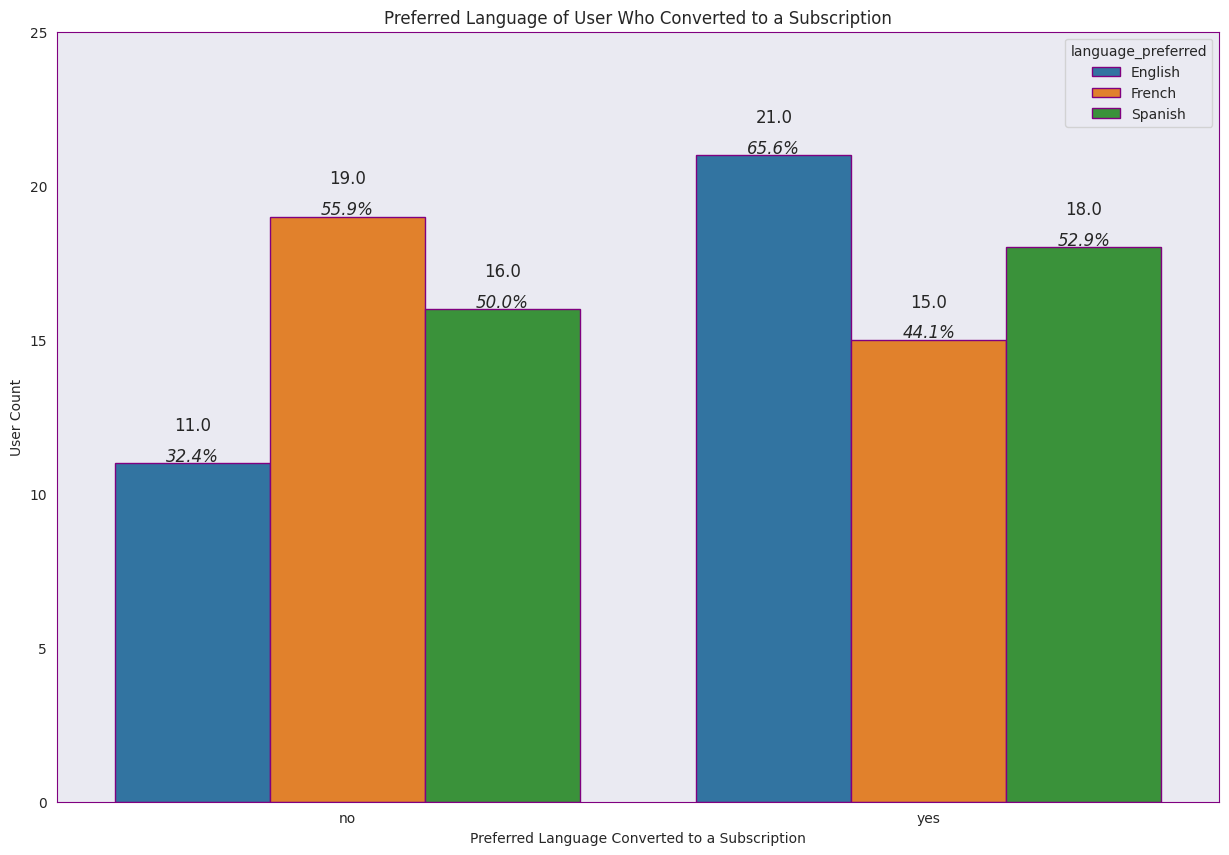

In [39]:
#Create countplot based on converted  and language preferred
plt.figure(figsize=(15,10))
ax = sns.countplot(x='converted', data=df, hue = 'language_preferred',edgecolor='purple')
plt.xlabel ('Preferred Language Converted to a Subscription')
plt.ylabel ('User Count')
plt.title ('Preferred Language of User Who Converted to a Subscription')

# Increase the height of the y-axis
plt.ylim(0, 25)


# Label each bar with its count and percentage for English
for p in ax.patches[1:5:3]:
    prc = "{:.1f}%".format(100.0 * p.get_height() / df['language_preferred'].value_counts()['English'])  # percentage
    cnt = p.get_height()  # count
    xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
    yy = p.get_height()  # y coordinate of bar percentage label
    ax.annotate(prc, (xx, yy), ha="center", va="center", style='italic', size=12, xytext=(0, 5),
                textcoords="offset points")  # annotate percentage
    ax.annotate(cnt, (xx, yy + 1), ha="center", va="center", size=12, xytext=(0, 5),
                textcoords="offset points")  # annotate count

# Label each bar with its count and percentage for Spanish
for p in ax.patches [2:6:3]:
   prc = "{:.1f}%".format(100.0*p.get_height() / df.language_preferred.value_counts()['Spanish'])#percentage
   cnt = p.get_height()  # count
   xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
   yy = p.get_height()  # y coordinate of bar percentage label
   ax.annotate(prc, (xx, yy), ha="center", va="center", style='italic', size=12, xytext=(0,5),
               textcoords="offset points")  # annotate percentage
   ax.annotate(cnt, (xx, yy + 1), ha="center", va="center", size=12, xytext=(0, 5),
               textcoords="offset points")  # annotate count

# Label each bar with its count and percentage for French
for p in ax.patches[0:4:3]:
    prc = "{:.1f}%".format(100.0 * p.get_height() / df['language_preferred'].value_counts()['French'])  # percentage
    cnt = p.get_height()  # count
    xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
    yy = p.get_height()  # y coordinate of bar percentage label
    ax.annotate(prc, (xx, yy), ha="center", va="center", style='italic', size=12, xytext=(0, 5),
                textcoords="offset points")  # annotate percentage
    ax.annotate(cnt, (xx, yy + 1), ha="center", va="center", size=12, xytext=(0, 5),
                textcoords="offset points")  # annotate count

plt.show();


**Observations:**

More users who chose the English language over any other language have chosen to convert to the subscription, 65.6% compared to 44.1% and 52.9%.<br>
Those users who preferred the English language converted to subscription more often than not converted, 65.6% compared to 34.4%. <br>
Those users who preferred the Spanish language converted to subscription more often than not converted, 52.9% to 47.1%. <br>
Those users who preferred the French language chose to not convert to subscription more often than to convert to a subscription, 55.9% compared to 44.1%.<br>
Based on these results, it appears whether a user converts or not may depend on the preferred language of the user. This will be verified using the hypothesis testing.

In [40]:
# converted based on preferred language of English
converted_English = df[(df['language_preferred'] == 'English') & (df['converted'] == 'yes')]
converted_English_count = converted_English['user_id'].count()

# converted based on preferred language of French
converted_French = df[(df['language_preferred'] == 'French') & (df['converted'] == 'yes')]
converted_French_count = converted_French['user_id'].count()

# converted based on preferred language of Spanish
converted_Spanish = df[(df['language_preferred'] == 'Spanish') & (df['converted'] == 'yes')]
converted_Spanish_count = converted_Spanish['user_id'].count()

print(f"Count of user IDs who's preferred language was English and chose to convert is {converted_English_count}.", end="")
print()
print(f"Count of user IDs who's preferred language was French and chose to convert is {converted_French_count}.", end="")
print()
print(f"Count of user IDs who's preferred language was Spanish and chose to convert is {converted_Spanish_count}.", end="")

Count of user IDs who's preferred language was English and chose to convert is 21.
Count of user IDs who's preferred language was French and chose to convert is 15.
Count of user IDs who's preferred language was Spanish and chose to convert is 18.

### Step 1: Define the null and alternate hypotheses

**Comparison based on preferred language**

H0 = The conversion rate is independent of the preferred language.

Ha = The conversion rate is not independent of the preferred language.



### Step 2: Select Appropriate test

Since we have two categorical variables and want to determine if they are dependent on each other I will perform a Chi-Square Test of Independence. This will help us determine if the variables are related, if the outcome of one will impact the results of the other.

### Step 3: Decide the significance level

The significance level provided is $\alpha$=0.05.

### Step 4: Collect and prepare data

In [41]:
#Create contingency table
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])

#Display the contingency table
print("Contingency Table:")
print(contingency_table)
print()

#Create a groupby that includes converted and user count
users_per_converted = df.groupby('converted')['user_id'].count()
users_per_converted
print()
print()

print(users_per_language)


Contingency Table:
language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18



converted
no     46
yes    54
Name: user_id, dtype: int64



language_preferred
English    32
French     34
Spanish    34
Name: user_id, dtype: int64


**Chi-Square Test for independece assumptions:**

Categorical variables - Yes, variables are language_preferred and converted.

Expected value of the number of sample observatons in each level of the variable is at least 5 - Yes, Each variable has a sample of over 5, (English 32, French 34, Spanish 34), Converted (Converted 54, Not Converted 46)

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Based on these answers we can use the Chi-Square Test for Independence.

### Step 5: Calculate the p-value

In [42]:
#Perform chi-square test
chi_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

#Output the results
print('The Chi-square statistic:', chi_stat)
print('The Degrees of freedom:', dof)
print('The p-value is', p_val)


The Chi-square statistic: 3.0930306905370837
The Degrees of freedom: 2
The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

---



In [43]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_val < 0.05:
    print(f'As the p-value of {p_val} is less than the level of significance, we reject the null hypothesis. The converted status is dependent on the language preferred.')
else:
    print(f'As the p-value of {p_val} is greater than the level of significance, we fail to reject the null hypothesis. The converted status is independent of the language preferred.')

As the p-value of 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis. The converted status is independent of the language preferred.


### Step 7:  Draw inference

Since the p-value is greater than 5%, we cannot reject the null hypothesis that says the conversion rate is independent of the language preferred. We do not have enough statistical evidence to say that whether a user converts or not is dependent on their preferred language.

## 4. Is the time spent on the new page the same for the different language users?

### Perform Visual Analysis

In [44]:
#Create goupby for language preferred and time spent on the page that shows mean, std, 25%, median, 75%, min and max
time_spent_per_preferred_language = df.groupby('language_preferred', dropna=False)['time_spent_on_the_page'].agg(
    mean='mean',
    std='std',
    percentile_25=lambda x: x.quantile(0.25),
    median='median',
    percentile_75=lambda x: x.quantile(0.75),
    min='min',
    max='max'
).reset_index()

time_spent_per_preferred_language.rename(columns={
    'mean': 'mean_time_spent',
    'std': 'std_time_spent',
    'percentile_25': 'time_spent_25%',
    'median': 'time_spent_median',
    'percentile_75': 'time_spent_75%',
    'min': 'min_time_spent',
    'max': 'max_time_spent'
}, inplace=True)
print(time_spent_per_preferred_language)

  language_preferred  mean_time_spent  std_time_spent  time_spent_25%  \
0            English             5.56            2.62            3.62   
1             French             5.25            2.68            3.40   
2            Spanish             5.33            1.82            4.47   

   time_spent_median  time_spent_75%  min_time_spent  max_time_spent  
0               5.76            7.14            0.22           10.50  
1               5.31            7.37            0.40           10.71  
2               5.61            6.52            0.19            8.72  


<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Time Spent on the Page in Minutes')

Text(0.5, 0, 'Preferred Language')

Text(0.5, 1.0, 'Average Time Spent on the Page per Preferred Language')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

Text(0, 10, '5.56')

Text(0, 10, '5.25')

Text(0, 10, '5.33')

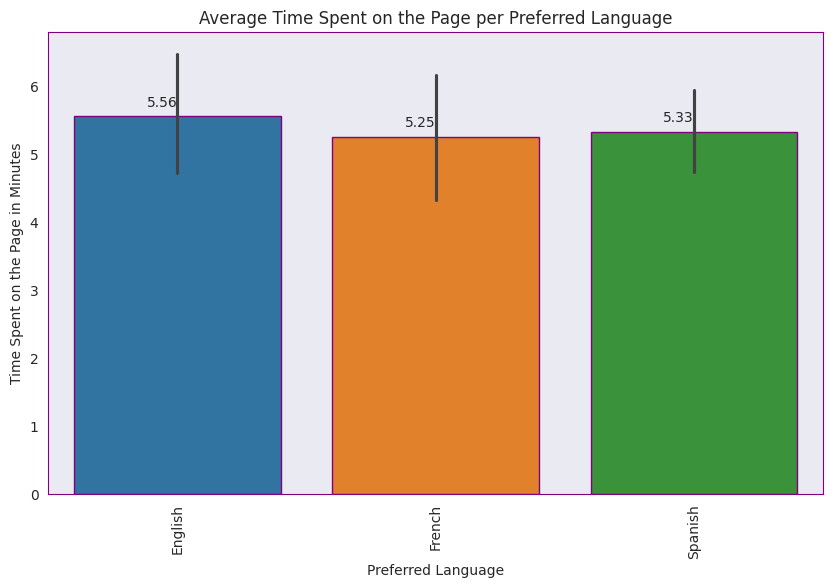

In [45]:
# Barplot showing time spent per language preferred
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue = 'language_preferred',edgecolor='purple')
plt.ylabel('Time Spent on the Page in Minutes')
plt.xlabel('Preferred Language')
plt.title('Average Time Spent on the Page per Preferred Language')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')  #

# Label each bar with its value (centered within the bar)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='right', va='center', xytext=(0, 10), textcoords='offset points')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

Text(0.5, 0, 'Time Spent on the Page')

Text(0, 0.5, 'Number of Users')

Text(0.5, 1.0, 'Histogram with KDE for Time Spent on the Page by Language Preferred')

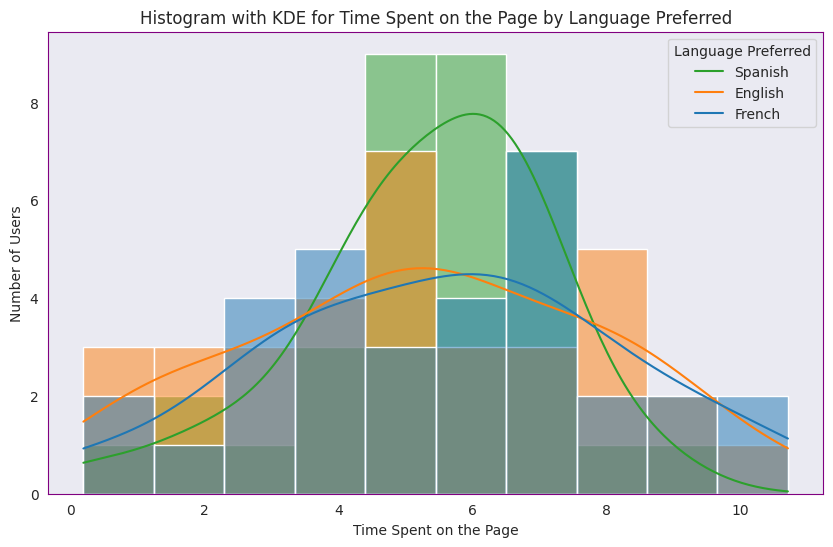

In [46]:
# Create a histogram with KDE for each language
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_spent_on_the_page', hue='language_preferred', kde=True, bins=10)

# Set labels and title
plt.xlabel('Time Spent on the Page')
plt.ylabel('Number of Users')
plt.title('Histogram with KDE for Time Spent on the Page by Language Preferred')

# Create a custom legend
legend_labels = df['language_preferred'].unique()
plt.legend(title='Language Preferred', labels=legend_labels)

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Language Preferred')

Text(0, 0.5, 'Standard Deviation (Time Spent on Page)')

Text(0.5, 1.0, 'Standard Deviation of Time Spent on Page by Language Preferred')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

(0.0, 3.0)

Text(0, 2.621078772462135, '2.62')

Text(1, 2.6754129905926165, '2.68')

Text(2, 1.8180950246663614, '1.82')

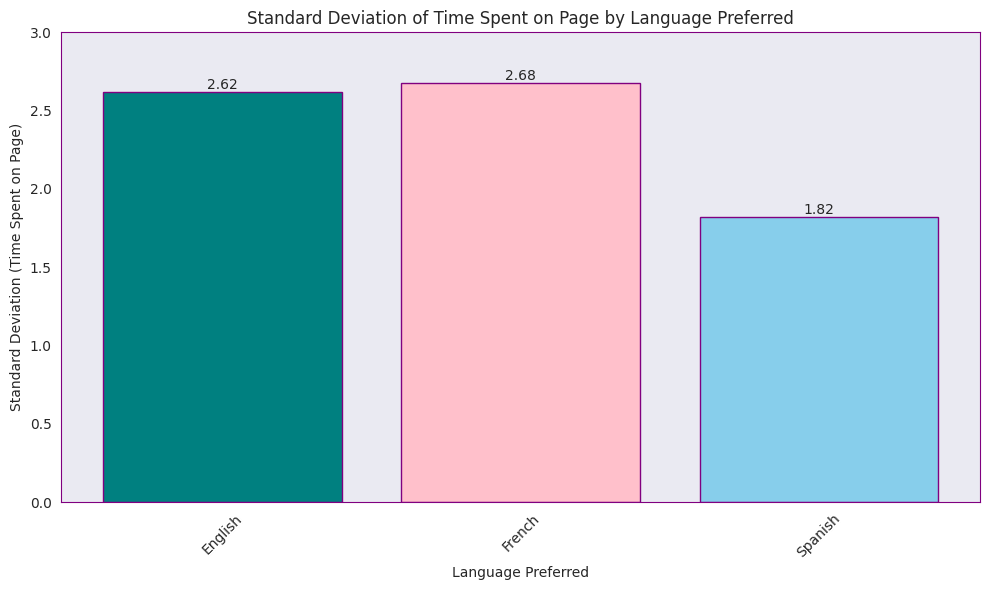

In [47]:
# Calculate the standard deviation for each language_preferred
std_dev = df.groupby('language_preferred')['time_spent_on_the_page'].std()

# Define colors for each language
colors = {
    'English': 'teal',
    'Spanish': 'skyblue',
    'French': 'pink'
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(std_dev.index, std_dev, color=[colors[lang] for lang in std_dev.index], edgecolor='purple')
plt.xlabel('Language Preferred')
plt.ylabel('Standard Deviation (Time Spent on Page)')
plt.title('Standard Deviation of Time Spent on Page by Language Preferred')
plt.xticks(rotation=45)
plt.ylim(0, 3)

# Add labels on top of the bars (adjust vertical alignment)
# Add labels on top of the bars
for i, val in enumerate(std_dev.values):
  plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

<BarContainer object of 1 artists>

Text(English, 8.205141272462134, '5.56 ± 2.62')

<BarContainer object of 1 artists>

Text(French, 7.9536482847102645, '5.25 ± 2.68')

<BarContainer object of 1 artists>

Text(Spanish, 7.1748597305487145, '5.33 ± 1.82')

Text(0.5, 0, 'Preferred Language')

Text(0, 0.5, 'Time Spent on the Page')

Text(0.5, 1.0, 'Time Spent on the Page by Preferred Language with Mean and Standard Deviation')

([0, 1, 2],
 [Text(0, 0, 'English'), Text(1, 0, 'French'), Text(2, 0, 'Spanish')])

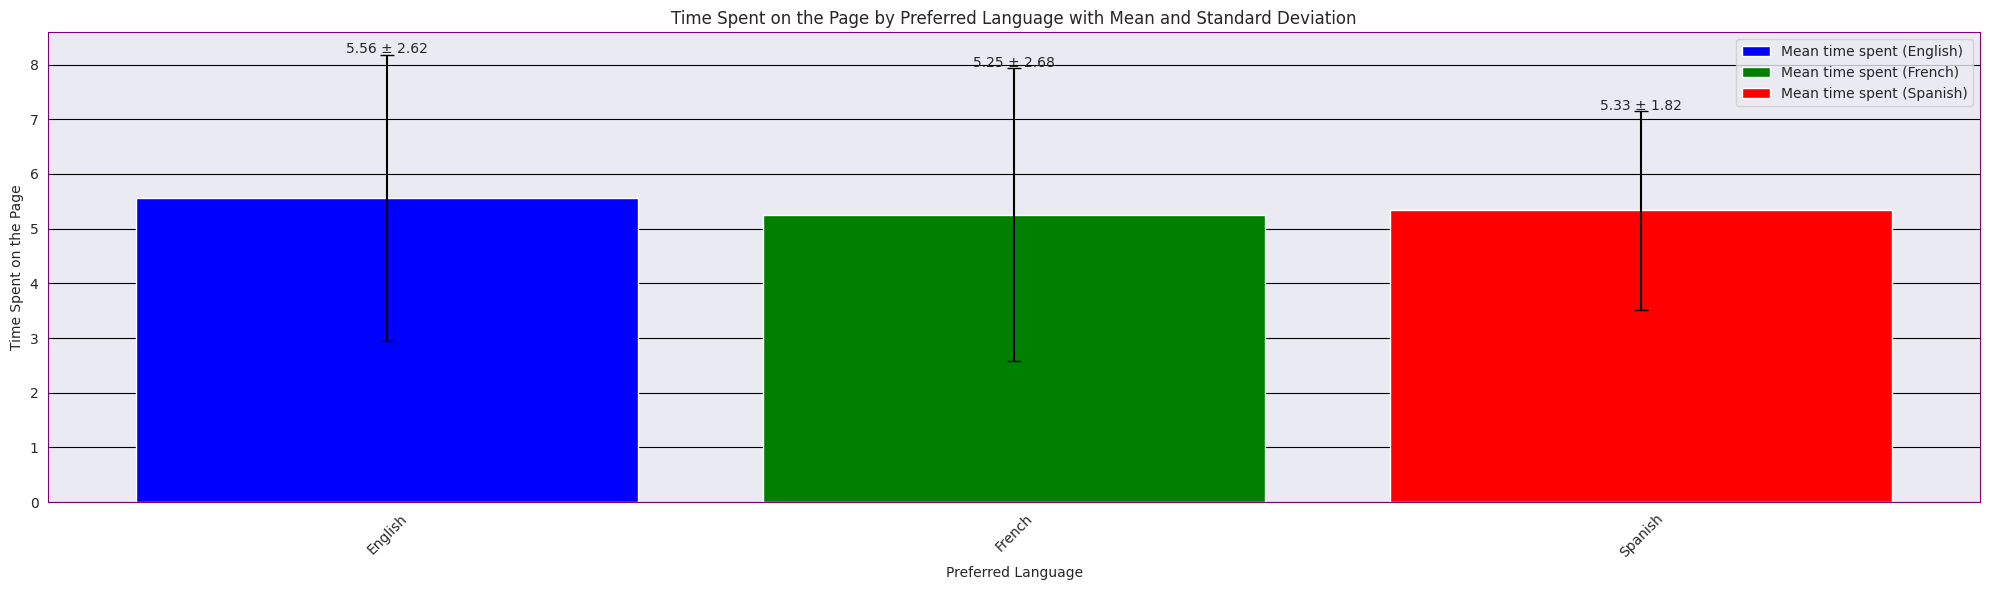

In [48]:
mean_time = df.groupby('language_preferred')['time_spent_on_the_page'].mean()
std_time = df.groupby('language_preferred')['time_spent_on_the_page'].std()

# Define colors for each language
colors = ['b', 'g', 'r', 'purple']

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the mean values with error bars
for i, lang in enumerate(mean_time.index):
    plt.bar(lang, mean_time[lang], yerr=std_time[lang], capsize=5, label=f'Mean time spent ({lang})', color=colors[i])

 # Add labels above the bars
    plt.text(lang, mean_time[lang] + std_time[lang]+.025, f"{mean_time[lang]:.2f} ± {std_time[lang]:.2f}", ha='center')

# Customize the plot
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page')
plt.title('Time Spent on the Page by Preferred Language with Mean and Standard Deviation')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()

**Observations:**

English has the longest average time spent on the page at 5.56 minutes, whereas French has the least average time spent on the page at 5.25 minutes.

Average time from highest to lowest is only a difference of 31 seconds.

The standard deviation differs from the highest which is French at 2.68 minutes to the lowest Spanish at 1.82 minute.

This is a difference of 86 seconds.

### Step 1: Define the null and alternate hypotheses

**Comparison based on time spent on page per language preferred**

Let  μ  be the amount of time spent per language

Null Hypothesis <br>
H0 = μ1 = μ2 = μ3 <br>

Alternate Hypothesis <br>
Ha = One or more of the languages have a mean spent time on the page that is different than the other languages <br>

μ1, μ2, μ3 are the preferred languages of English, Spanish, and French

### Step 2: Select Appropriate test

We are comparing the means of three languages English, French, and Spanish. These are independent populations of continuous variables. The assumption is there is a normal distribution, if that assumption is correct I can perform a One-way Anova test. I need to validate this assumption using the Shapiro-Wilk's test and Levene's test.

**Shapiro-Wilk's Test**

Null hypothesis:

H0 = Time spent follows a normal distribution

Alternate hypothesis:

H1 = Time spend does not follow a normal distribution

In [49]:
new_landing_page = df[df.landing_page == 'new']

# Calculate p-value using shapiro() from stats library
w, p_val = stats.shapiro(new_landing_page.time_spent_on_the_page)

print('The p-value is found to be', p_val) # print p-value
print('The w statistic is found to be', w)

The p-value is found to be 0.8040016293525696
The w statistic is found to be 0.9857664704322815


In [50]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_val < 0.05:
    print(f'As the p-value of {p_val} is less than the level of significance, we reject the null hypothesis. The time spent is a not normal distribution.')
else:
    print(f'As the p-value of {p_val} is greater than the level of significance, we fail to reject the null hypothesis. The time spent is a normal distribution.')

As the p-value of 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis. The time spent is a normal distribution.


Levene's Test

Null hypothesis:

H0 = Population variances are equal

Alternate hypothesis:

H1 = Population variances are not equal

In [51]:
# Calculate p-value using levene()
w, p_val = stats.levene(new_landing_page.time_spent_on_the_page[new_landing_page.language_preferred == 'English'],
                         new_landing_page.time_spent_on_the_page[new_landing_page.language_preferred == 'French'],
                         new_landing_page.time_spent_on_the_page[new_landing_page.language_preferred == 'Spanish'])

print('The p-val is found to be', p_val)
print('The w statistic is found to be', w)

The p-val is found to be 0.46711357711340173
The w statistic is found to be 0.7736446756800186


In [52]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_val < 0.05:
    print(f'As the p-value of {p_val} is less than the level of significance, we reject the null hypothesis. Population variances are not equal.')
else:
    print(f'As the p-value of {p_val} is greater than the level of significance, we fail to reject the null hypothesis. Population variances are equal.')

As the p-value of 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis. Population variances are equal.


### Step 3: Decide the significance level

The significance level provided is $\alpha$=0.05.

### Step 4: Collect and prepare data

In [53]:
# calculate the average time spent on the new page by users viewing different languages
new_landing_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

English_language = new_landing_page[new_landing_page['language_preferred']=="English"]['time_spent_on_the_page']
French_language = new_landing_page[new_landing_page['language_preferred']=='French']['time_spent_on_the_page']
Spanish_language = new_landing_page[new_landing_page['language_preferred']=='Spanish']['time_spent_on_the_page']

language_preferred
English   6.66
French    6.20
Spanish   5.84
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [54]:
#Perform one-way Anova
test_stat, p_value = stats.f_oneway(English_language,French_language,Spanish_language)

print('F-statistic: ',test_stat)
print('p-value: ',p_value)

F-statistic:  0.8543992770006822
p-value:  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [55]:
# print the conclusion based on p-value, reject or fail to reject the null hypothesis
if p_val < 0.05:
    print(f'As the p-value of {p_val} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value of {p_val} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value of 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than 5%, we cannot reject the null hypothesis that says the conversion rate is independent of the language preferred. We do not have enough statistical evidence to say that the amount of time spent on the new page for all languages is not equal.

## Conclusion and Business Recommendations

**Conclusions and Recommendations based on the Exploratory Data Analysis (EDA) and Hypothesis testing**

**Conclusions**

The average time spent on the new page versus the old page is 6.22 to 4.53. That is an increase of 1.69 minutes. Based on our hypothesis testing we have enough evidence to say the new landing page is more enticing than the old landing page when it comes to time spent on the page and converting to a subscription. <br>

66% of users who viewed the new landing page converted compared to 42% of the users who viewed the old landing page. Based on our hypothesis testing we have enough statistical evidence to say the new landing page entices users to convert to a subscription more than the old landing page. <br>

Out of the 100 users: 32 chose English, 34 chose French, and 34 chose Spanish. Even though fewer users chose English, those who chose English converted to a subscription more than any other language. 65.6% of users who chose English chose to convert to a subscription compared to French 44.1% and Spanish 52.9%. However, based on the hypothesis testing whether a user converts to a subscription is not dependent on what language they prefer. <br>

The average time spent looking at the page for all languages was between 5 and 6 minutes, with the average for English being the most at 5.56 minutes and French being the least at 5.25 minutes. Currently, it does not appear that a page with one language is more enticing to a user than a page with a different language based on average time spent. Based on the hypothesis testing we do not have enough statistical evidence to say that the amount of time spent on the new page for all languages is not equal. <br>

**Recommendations**

It would be best if you started directing the users to the new landing page since the goal is to get more users to convert to subscriptions. I would suggest this even though you could potentially be making more additions to the landing page. This will increase the subscription amount while additional improvements are being made. <br>

Although the new landing page is more enticing than the old landing page, an average of 6.22 minutes viewing a page is not very much. What other improvements can be made to the new landing page to make it more enticing? This is something that should be researched further. <br>

All 3 language choices should be kept, as the average time spent on each of the three languages is between 5-6 minutes. <br>

I believe we should work on the French language page and make it more enticing, so more users convert. The second language page that should be looked at to see if anything can be improved is the Spanish page. However, based on the hypothesis testing, all language pages should be looked at more to see if improvements should be made. <br>

Should the landing pages look different depending on the language that is picked? Would for example a user who prefers Spanish want to see something different than a user who speaks French or English? This topic should be reviewed more to see if additional changes to the page should be made. <br>

Would providing more languages increase conversion rates? This is another suggestion that should be further researched.





In [57]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/Python Course/Project 2/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb'

[NbConvertApp] WARNING | pattern '///content/drive/MyDrive/Python Course/Project 2/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any ques

CalledProcessError: Command 'jupyter nbconvert --to html //'/content/drive/MyDrive/Python Course/Project 2/ENews_Express_Learner_Notebook%5BFull_Code_Version%5D.ipynb'
' returned non-zero exit status 255.

___